In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os

In [2]:
online_retails = pd.read_csv("./Downloads/Online_Retail.csv", encoding='windows-1252')

In [3]:
CusID_not_null = online_retails[online_retails['CustomerID'].notna()]

In [4]:
CusID_not_null.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/10 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/10 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/10 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/10 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/10 8:34,1.69,13047.0,United Kingdom


In [5]:
CusID_not_null['InvoiceDate'] = pd.to_datetime(CusID_not_null['InvoiceDate'], format = '%m/%d/%y %H:%M')
import datetime
record_date = max(CusID_not_null['InvoiceDate']) + datetime.timedelta(days=1)

C:\Users\BINHBU~1\AppData\Local\Temp/ipykernel_15008/1227013087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CusID_not_null['InvoiceDate'] = pd.to_datetime(CusID_not_null['InvoiceDate'], format = '%m/%d/%y %H:%M')


In [6]:
CusID_not_null['Total'] = CusID_not_null['Quantity'] * CusID_not_null['UnitPrice']

C:\Users\BINHBU~1\AppData\Local\Temp/ipykernel_15008/1197030811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CusID_not_null['Total'] = CusID_not_null['Quantity'] * CusID_not_null['UnitPrice']


In [7]:
CusID_not_null.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08


In [8]:
df_RFM = CusID_not_null.groupby(['CustomerID']).agg(
{'InvoiceDate': lambda x: (record_date - x.max()).days,
 'InvoiceNo':'count',
 'Total':'sum'
}
)

In [9]:
df_RFM.head(10)

,InvoiceDate,InvoiceNo,Total
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40
12352.0,36,95,1545.41
12353.0,204,4,89.00
12354.0,232,58,1079.40
12355.0,214,13,459.40


In [10]:
df_RFM.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency','Total':'Monetary'}, inplace = True)

In [11]:
df_RFM.head(10)

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40
12352.0,36,95,1545.41
12353.0,204,4,89.00
12354.0,232,58,1079.40
12355.0,214,13,459.40


C:\Users\Binh Bui\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Binh Bui\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Binh Bui\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to

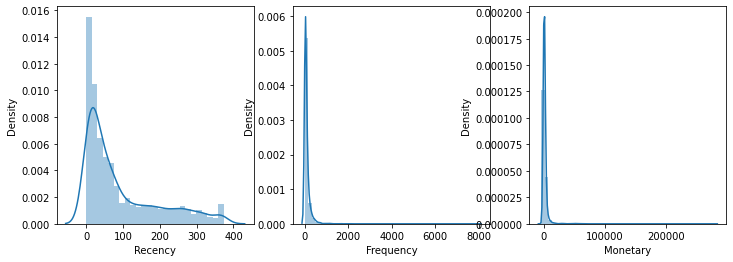

In [12]:
fig, ax = plt.subplots(1,3,figsize=(12,4))
sns.distplot(df_RFM['Recency'], ax = ax[0])
sns.distplot(df_RFM['Frequency'], ax = ax[1])
sns.distplot(df_RFM['Monetary'], ax = ax[2])
plt.show()

In [13]:
from scipy import stats
def skewness(x):
    fig, ax = plt.subplots(2,2,figsize=(5,5))
    sns.distplot(df_RFM[x], ax =  ax[0,0])
    sns.distplot(np.log(df_RFM[x]), ax =  ax[0,1])
    sns.distplot(np.sqrt(df_RFM[x]), ax =  ax[1,0])
    sns.distplot(stats.boxcox(df_RFM[x])[0], ax =  ax[1,1])
    plt.tight_layout()
    plt.show()
    
    print(df_RFM[x].skew().round(2))
    print(np.log(df_RFM[x]).skew().round(2))
    print(np.sqrt(df_RFM[x]).skew().round(2))
    print(pd.Series(stats.boxcox(df_RFM[x])[0]).skew().round(2))

C:\Users\Binh Bui\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Binh Bui\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Binh Bui\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to

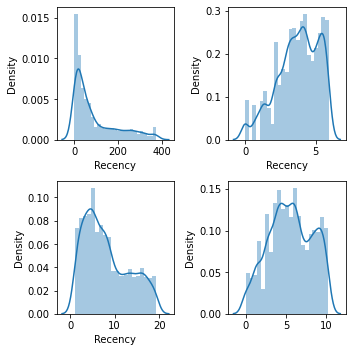

1.25
-0.53
0.59
-0.07


In [14]:
skewness('Recency')

C:\Users\Binh Bui\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Binh Bui\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Binh Bui\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to

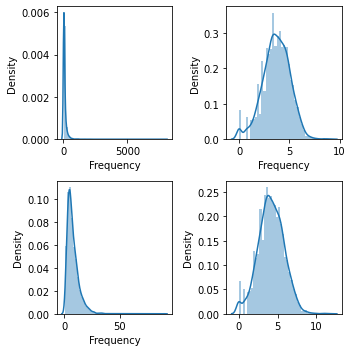

18.15
-0.24
3.2
0.0


In [15]:
skewness('Frequency')

C:\Users\Binh Bui\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Monetary', ylabel='Density'>

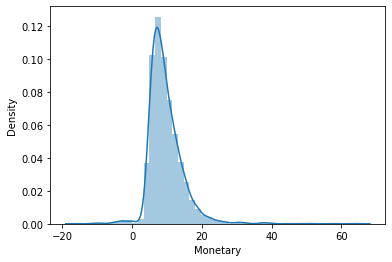

In [16]:
sns.distplot(np.cbrt(df_RFM['Monetary']))


In [17]:
df_RFM_tr = pd.DataFrame()
df_RFM_tr['Recency'] = stats.boxcox(df_RFM['Recency'])[0]
df_RFM_tr['Frequency'] = stats.boxcox(df_RFM['Frequency'])[0]
df_RFM_tr['Monetary'] = pd.Series(np.cbrt(df_RFM['Monetary'])).values
df_RFM_tr.head(10)

,Recency,Frequency,Monetary
0,9.876619,0.707055,0.000000
1,0.735846,6.060363,16.273929
2,6.384920,3.794006,12.158183
3,3.826255,4.862047,12.068017
4,9.741979,3.075409,6.941001
5,4.942814,5.201183,11.561510
6,8.666162,1.442672,4.464745
7,8.988684,4.570059,10.257955
8,8.785339,2.762414,7.716085
9,4.147379,4.591627,14.113750


In [18]:
df_RFM_tr.count()

Recency      4372
Frequency    4372
Monetary     4372
dtype: int64

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_RFM_tr)
df_RFM_tr = scaler.transform(df_RFM_tr)
pd.DataFrame(df_RFM_tr).head(10)

,0,1,2
0,1.611173,-2.098072,-1.925647
1,-1.797592,1.151346,1.330542
2,0.309053,-0.224316,0.507038
3,-0.645121,0.423978,0.488997
4,1.560964,-0.660498,-0.536848
5,-0.228735,0.629831,0.387652
6,1.159771,-1.651557,-1.032313
7,1.280046,0.246743,0.126828
8,1.204215,-0.850484,-0.381765
9,-0.525368,0.259835,0.898320


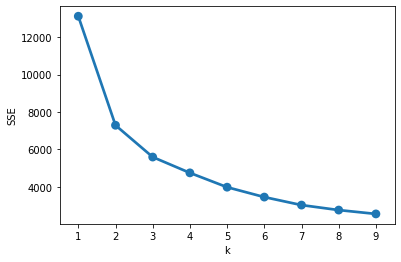

In [20]:
from sklearn.cluster import KMeans
sse = {}
for k in range (1,10):
    kmeans = KMeans(n_clusters = k, random_state=42)
    kmeans.fit(df_RFM_tr)
    sse[k] = kmeans.inertia_
plt.title = 'K Selection by Elbow Method'
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()),y=list(sse.values()))
plt.show()

In [40]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(df_RFM_tr)
label = model.fit_predict(df_RFM_tr)
print(label)

[1 0 2 ... 2 0 2]


In [28]:
df_RFM['ClusterNo'] = model.labels_
df_RFM.head(10)

,Recency,Frequency,Monetary,ClusterNo
CustomerID,,,,
12346.0,326,2,0.00,1
12347.0,2,182,4310.00,0
12348.0,75,31,1797.24,2
12349.0,19,73,1757.55,2
12350.0,310,17,334.40,1
12352.0,36,95,1545.41,2
12353.0,204,4,89.00,1
12354.0,232,58,1079.40,1
12355.0,214,13,459.40,1


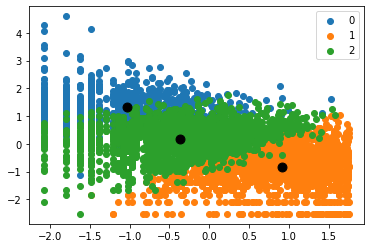

In [44]:
unique_labels = np.unique(label)
centroids = model.cluster_centers_
for i in unique_labels:
    plt.scatter(df_RFM_tr[label == i , 0] , df_RFM_tr[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [45]:
df_RFM.groupby('ClusterNo').agg(
{
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':'mean'
}).round(2)

,Recency,Frequency,Monetary
ClusterNo,,,
0,17.88,312.26,7356.52
1,185.51,19.15,351.30
2,42.63,67.12,1003.74


In [48]:
df_RFM.loc[(df_RFM['ClusterNo']) == 2]

,Recency,Frequency,Monetary,ClusterNo
CustomerID,,,,
12348.0,75,31,1.797240e+03,2
12349.0,19,73,1.757550e+03,2
12352.0,36,95,1.545410e+03,2
12356.0,23,59,2.811430e+03,2
12358.0,2,19,1.168060e+03,2
...,...,...,...,...
18273.0,2,3,2.040000e+02,2
18274.0,18,22,1.776357e-15,2
18276.0,21,16,3.233600e+02,2
